## ANOVA - Analysis of Variance

We're going to preform ANOVA on restaurants at Myrtle Beach!



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Restaurant_Anova_data.csv to Restaurant_Anova_data.csv


In [3]:
anova_dat = pd.read_csv("Restaurant_Anova_data.csv")
print(anova_dat.dtypes)
anova_dat.head(50)

Type     object
Price     int64
dtype: object


,Type,Price
0,Italian,12
1,Italian,13
2,Italian,15
3,Italian,17
4,Italian,18
5,Italian,20
6,Italian,17
7,Italian,24
8,Seafood,16
9,Seafood,18


In [4]:
anova_dat.info()
anova_dat.head
print(anova_dat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    24 non-null     object
 1   Price   24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes
          Type  Price
0      Italian     12
1      Italian     13
2      Italian     15
3      Italian     17
4      Italian     18
5      Italian     20
6      Italian     17
7      Italian     24
8      Seafood     16
9      Seafood     18
10     Seafood     17
11     Seafood     26
12     Seafood     23
13     Seafood     15
14     Seafood     19
15     Seafood     18
16  Steakhouse     24
17  Steakhouse     19
18  Steakhouse     23
19  Steakhouse     25
20  Steakhouse     21
21  Steakhouse     22
22  Steakhouse     27
23  Steakhouse     31


Generate the Model and Print the ANOVA table

In [5]:
formula = 'Price ~ C(Type)'
model = ols(formula, data=anova_dat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

          sum_sq    df         F    PR(>F)
C(Type)    208.0   2.0  7.328859  0.003852
Residual   298.0  21.0       NaN       NaN


In [ ]:
# 0.003852 < 0.05
# Reject null hypothesis Ho
# We can conclude that at least one mean is different

Let's generate a box plot for comparing prices across restaurant type

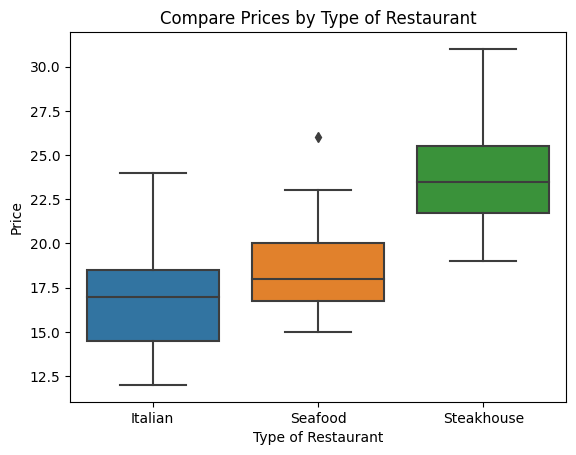

In [6]:

sns.boxplot(x="Type", y="Price", data=anova_dat)

# Add labels and a title
plt.title("Compare Prices by Type of Restaurant")
plt.xlabel("Type of Restaurant")
plt.ylabel("Price")


# Show the plot
plt.show()


Now let's conduct a post-hoc analysis of the groups using Tukey's multiple comparison method

In [7]:
# Compute a Tukey test
# Also known as Tukey's Honest Significant Difference test (HSD)
# Designed specifically for comparing groups in an ANOVA

tukey_results = pairwise_tukeyhsd(endog=anova_dat['Price'], groups=anova_dat['Type'], alpha=0.05)

print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
Italian    Seafood      2.0 0.5474 -2.7475  6.7475  False
Italian Steakhouse      7.0 0.0035  2.2525 11.7475   True
Seafood Steakhouse      5.0 0.0378  0.2525  9.7475   True
---------------------------------------------------------


In [8]:
# Look at p-adj for each grouping

# 0.5474 > 0.05
  # Fail to reject Ho - Italian and Seafood are not significantly different in price
# 0.0035 < 0.05
  # Reject Ho - Italian and Steakhouse ARE significantly different in price
# 0.0378 < 0.05
  # Reject Ho - Seafood and Steakhouse ARE significantly different in price